In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim

In [16]:
path_list = ['mys_bng_road.csv', 'mys_bng_train.csv']

In [74]:
from time import time


def get_filtered_data(min_sat = 5, time_interval=2400):
    geolocator = Nominatim(user_agent="mys_bng_test")
    req_columns = ['Altitude (m)', 'Speed (m/s)']
    lat_long_names = ['Latitude (°)', 'Longitude (°)']
    plt.figure()
    fig, ax = plt.subplots(2,1)
    fig.set_size_inches(12,10)
    for route_type, path in enumerate(path_list):
        data = pd.read_csv(path)
        data_1min = data.iloc[70:]
        req_keys = data_1min['Satellites']>=min_sat
        req_data = data_1min[req_keys][req_columns]
        lat_long_data = data_1min[req_keys][lat_long_names]
        min_alt_idx = req_data['Altitude (m)'].argmin()
        max_alt_idx = req_data['Altitude (m)'].argmax()
        time_interval = 1800 if route_type == 1 else 2400
        req_place_idx = list(range(0,req_data.shape[0],time_interval))
        addl_place_idx = [min_alt_idx,max_alt_idx]
        if route_type==1:
            addl_place_idx.append(req_data.shape[0]-1)
        req_place_idx.extend(addl_place_idx)
        ax[route_type].plot(req_data['Altitude (m)'],'.')

        for idx in req_place_idx:
            lat_long_list = lat_long_data.iloc[idx].loc[[ 'Latitude (°)', 'Longitude (°)']].to_list()
            lat_long = ",".join(map(str, lat_long_list))
            location = geolocator.reverse(lat_long)
            print_address = location.address.split(',')
            text = f"{print_address[0]}\n{print_address[-5]}\n{round(req_data[req_columns[0]].iloc[idx],2)}"
            xy = (idx+70, req_data[req_columns[0]].iloc[idx])
            xytext = (xy[0]-600 if idx==max_alt_idx else xy[0]-40 if idx!=min_alt_idx else xy[0]-60,\
            xy[1]-40 if idx > 3500 else xy[1]+30 if idx!=min_alt_idx else xy[1]+60)
            if idx==max_alt_idx : print(lat_long)
            ax[route_type].annotate(text,xy,xytext,arrowprops={'width':0.5,'headwidth':3,'headlength':2},\
                color='red' if idx in [max_alt_idx, min_alt_idx] else 'blue',\
                bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3))
            ax[route_type].set_xlabel('time(s)')
            ax[route_type].set_ylabel('altitude(m)')
            ax[route_type].grid(1)
            ax[route_type].set_title(f'Elevation profile of Mysuru-Bengaluru {"train" if route_type else "road"} route')
    plt.show()

12.88819759,77.56183552
12.95974105,77.54092857


<Figure size 432x288 with 0 Axes>

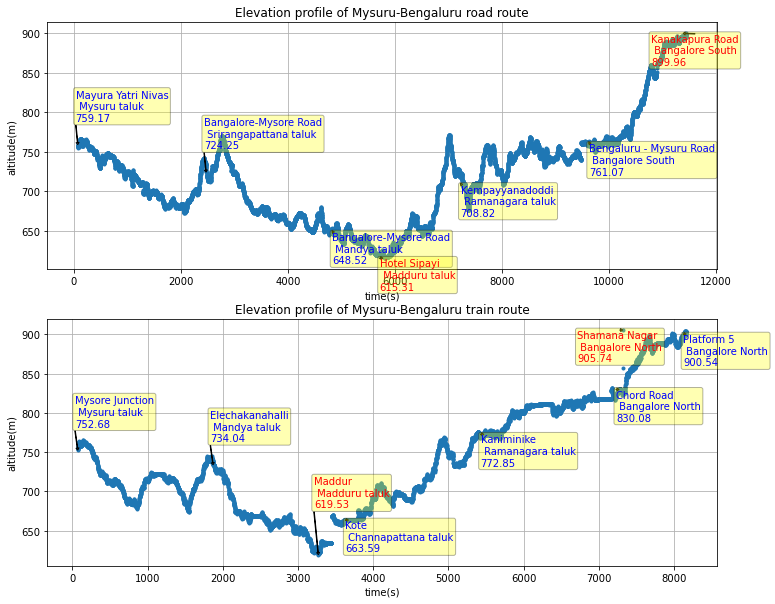

In [75]:
get_filtered_data()